In [1]:
import pandas as pd
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
import numpy as np

data = np.asarray(df) #zamiana dataframe na array

X = data[:,1:5] #tworzenie zmiennej, która zawiera dane (pomiary
y = data[:,5] #tworzenie zmiennej, która zawiera etykiety (Species)
print(y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2) #podział na dane treningowe i testowe
#0.2 oznacza, że 20% będzie walidacja

model = SVC(kernel = 'linear') #stworzenie klasyfikatora
#kernele to sposób dzielenia (linia, koło, itp)

model.fit(X_train, y_train) #trenowanie klasyfikatora - naucz się dopasować dane uczące doetykiet

y_pred = model.predict(X_test) #predykcja na danych testowych

acc = accuracy_score(y_test, y_pred) #policzenie accuracy - zależy nam żeby było jak największe
print(acc)

#powinno wyjść 1.0


0.9666666666666667


In [ ]:
#sprawdzić różne  i test size

In [18]:
def clasification(X,y,kernel, train_size):
    #random state - wyłączamy losowość, ustawiamy sobie parametry startowe
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = train_size, random_state = 42) #podział na dane treningowe i testowe
    model = SVC(kernel = kernel) #stworzenie klasyfikatora
    model.fit(X_train, y_train) #trenowanie klasyfikatora - naucz się dopasować dane uczące doetykiet
    y_pred = model.predict(X_test) #predykcja na danych testowych
    return accuracy_score(y_test, y_pred)

In [19]:
train_size = [0.2, 0.4, 0.6, 0.8 ]
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    for size in train_size:
        print(kernel, size, clasification(X,y, kernel, size)) #jest taka konwencja do zapisywana X jako zbioru uczącego się (duża litera)

linear 0.2 0.975
linear 0.4 0.9888888888888889
linear 0.6 1.0
linear 0.8 1.0
poly 0.2 0.9833333333333333
poly 0.4 0.9888888888888889
poly 0.6 1.0
poly 0.8 1.0
rbf 0.2 0.9333333333333333
rbf 0.4 0.9777777777777777
rbf 0.6 1.0
rbf 0.8 1.0


który kernel jest najlepszy? widzę że poly

wnioski: napisać który  kernel jest lepszy, która kombinacja jest najlepsza, jak podchodzic do wielkośvi test size - wszystko pdf

In [20]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'train size')

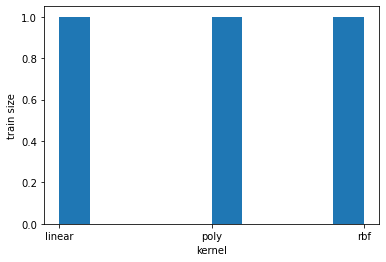

In [36]:
plt.hist(kernels)
plt.xlabel('kernel')
plt.ylabel('train size')